In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [7]:
df = pd.read_csv('heart_failure.csv')

In [8]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


##### Testing to see if any features are correlated with one another in an effort to reduce features

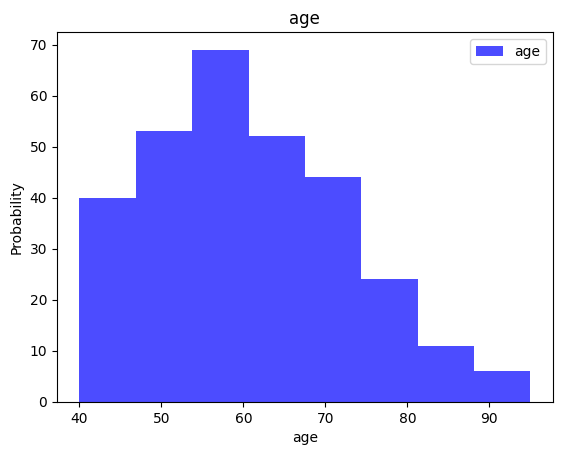

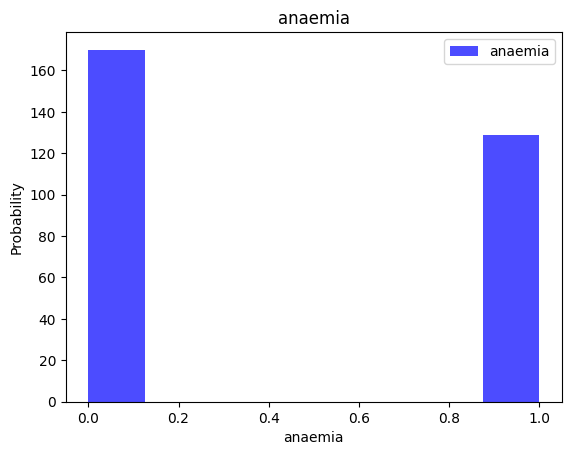

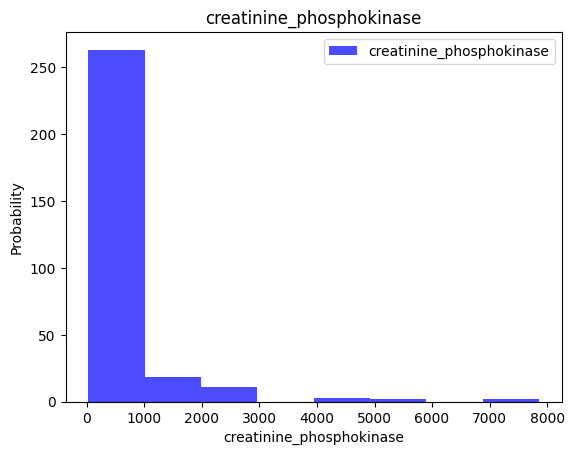

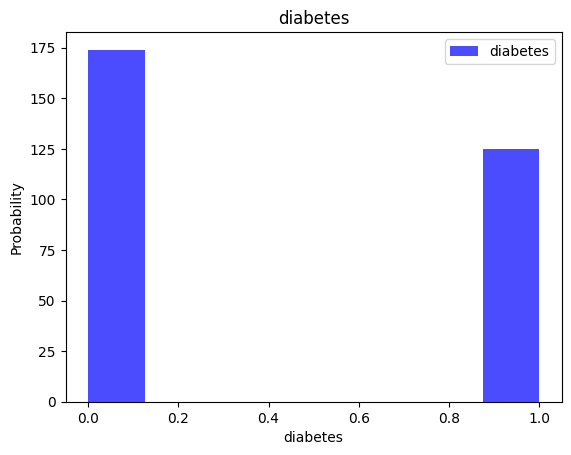

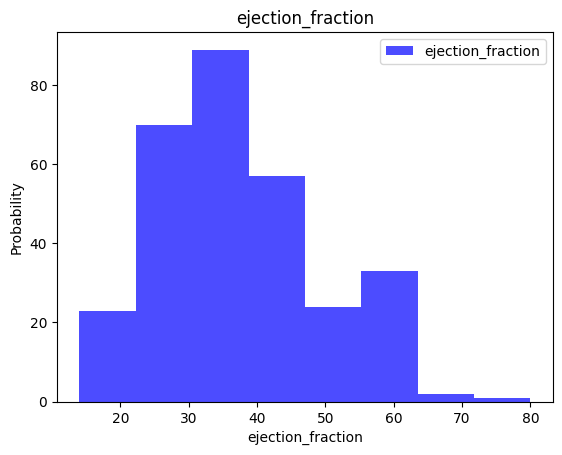

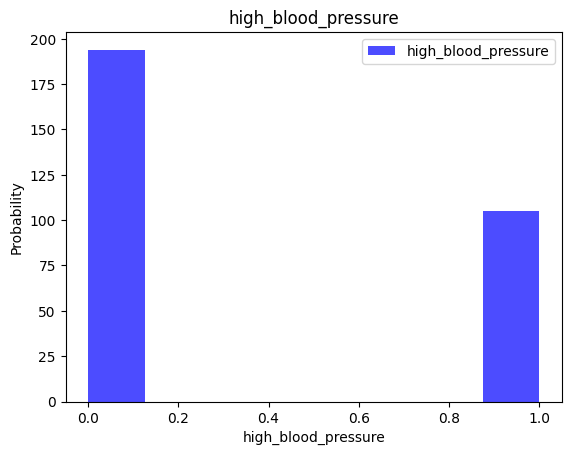

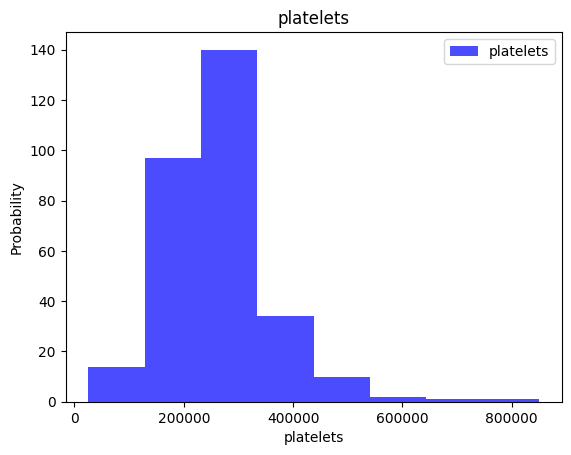

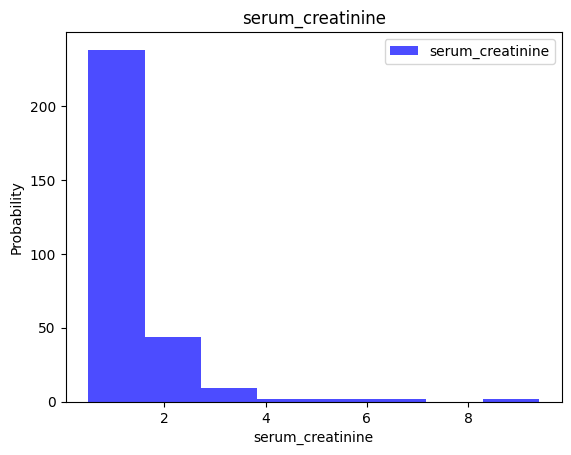

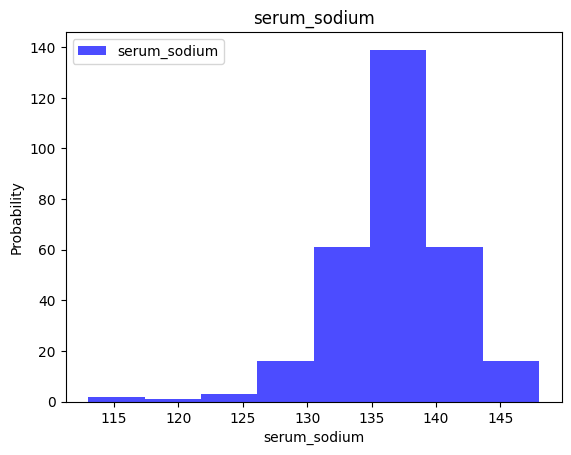

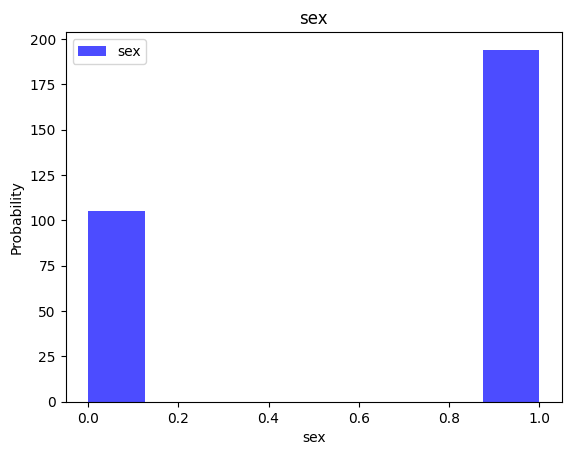

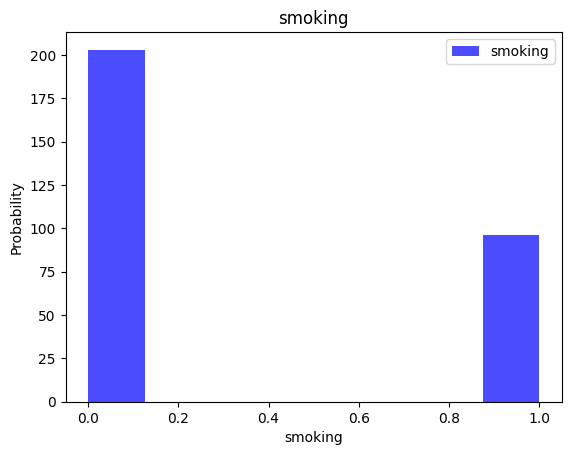

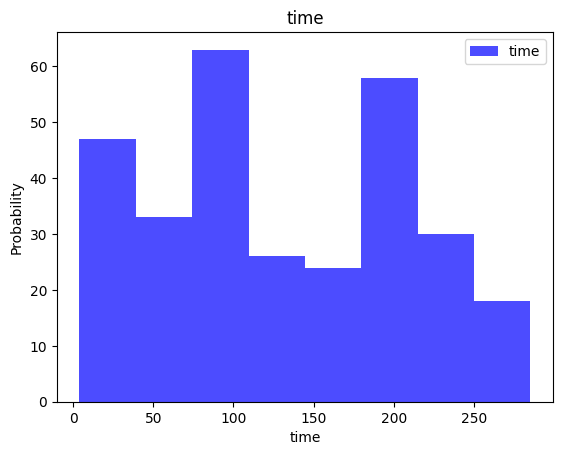

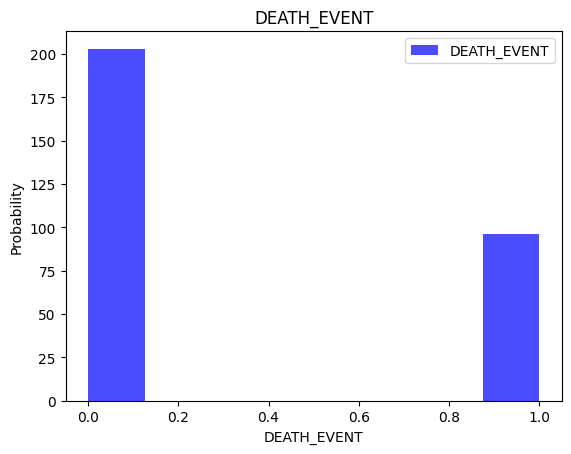

In [9]:
for i in range(len(df.columns)):
    label = df.columns[i]
    plt.hist(df[label], color='blue', label=label, alpha=0.7, bins=8)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

###### Since there is an imbalance in DEATH_EVENT values, I will use RandomUnderSampler to make the probability of the label more balanced. This should increase the accuracy of the model as it will interact with an even number for each of the label values

In [10]:
X_df = (df.iloc[:,:-1])
y = df.iloc[:,-1]

In [11]:
scaled = StandardScaler()
X_scaled = pd.DataFrame(scaled.fit_transform(X_df), columns = X_df.columns)
X_scaled

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


##### Doing PCA to reduce number of features to include essential ones

In [12]:
pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns = X_scaled.columns)

Text(0, 0.5, 'Explained Variance')

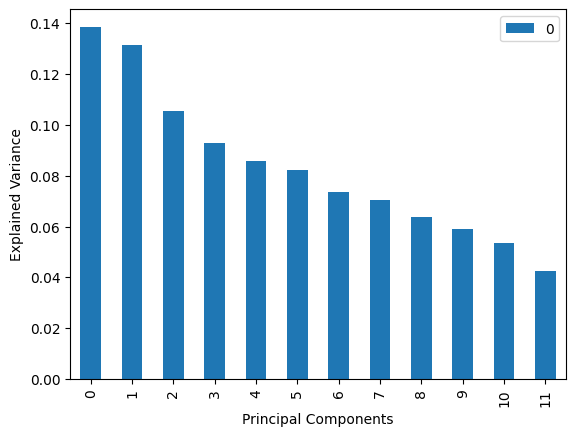

In [13]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar() #Plotting the explained variance
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

###### Since we want to keep the features that account for at least 80% of explained variance, we will use the first 9 features

In [14]:
X= X_scaled.iloc[:,:-3]
X.squeeze() # Turns dataframe into a series 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176
...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064


In [15]:
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X,y)

In [24]:
train_X, val_X, train_y, val_y = train_test_split(X_res, y_res)

In [25]:
model = RandomForestRegressor(random_state=0, criterion = "absolute_error")
rf_model = model.fit(train_X, train_y)


In [26]:
pred = rf_model.predict(val_X)
mean_absolute_error(val_y,pred)

0.33416666666666667

##### THhe mean absolute error is low, so the predictions the model is making are accurate most of the time. Another possible explanation is that it is guessing a binary value, so that could affect the scale of mean absoluter error